### Detecting_Natural_Disaster_From_Scratch

In this Notebook we will build model from scratch to detect natural disaster using VGG16 Model

In [12]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.metrics import plot_confusion_matrix
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import load_model

In [13]:
train_data_dir = './data/train'
valid_data_dir = './data/validation'
test_data_dir = './data/test'

In [14]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=10,
        classes=['earthquake','fire','flood'])  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
valid_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        valid_data_dir,
        target_size=(150, 150),
        batch_size=10,
        classes=['earthquake','fire','flood'])   #class_mode='binary') then either 0 or 1
# this is a similar generator, for test data
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_data_dir,
        target_size=(150, 150),
        batch_size=10,
        classes=['earthquake','fire','flood'])   #class_mode='binary') then either 0 or 1

Found 4039 images belonging to 3 classes.
Found 32 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [15]:
# dimensions of our images.
img_width, img_height = 150, 150
nb_train_samples = 2000
nb_validation_samples = 1000
batch_size = 40

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
print(input_shape,'input_shape')

(150, 150, 3) input_shape


In [16]:
print(train_generator.class_indices)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{'earthquake': 0, 'fire': 1, 'flood': 2}
{0: 'earthquake', 1: 'fire', 2: 'flood'}


In [17]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
print(STEP_SIZE_TRAIN,STEP_SIZE_VALID)

403 3


In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))

In [19]:
model.compile(optimizer='Adam',loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)       

In [20]:
model.fit_generator(generator=train_generator,validation_data=valid_generator,\
                    steps_per_epoch=STEP_SIZE_TRAIN,validation_steps=STEP_SIZE_VALID,verbose=1,epochs=5,)

Epoch 1/5
403/403 [==============================] - 53s 132ms/step - loss: 0.3435 - accuracy: 0.8124 - val_loss: 0.4065 - val_accuracy: 0.8889
Epoch 2/5
403/403 [==============================] - 58s 143ms/step - loss: 0.2568 - accuracy: 0.8781 - val_loss: 0.3186 - val_accuracy: 0.9091
Epoch 3/5
403/403 [==============================] - 56s 138ms/step - loss: 0.2277 - accuracy: 0.9063 - val_loss: 0.2656 - val_accuracy: 0.9697
Epoch 4/5
403/403 [==============================] - 52s 130ms/step - loss: 0.1717 - accuracy: 0.9302 - val_loss: 0.0071 - val_accuracy: 0.9697
Epoch 5/5
403/403 [==============================] - 55s 137ms/step - loss: 0.1440 - accuracy: 0.9430 - val_loss: 0.0694 - val_accuracy: 0.9222


In [21]:
model.save_weights('./model_weight/classifier_from_scratch.h5') 

In [22]:
test_img,test_labels=next(test_generator)
pred=model.predict_generator(test_generator,
steps=1,
verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
test_labels_indices=np.argmax(test_labels,axis=1)
predictions = [labels[k] for k in predicted_class_indices]
test_labes=[labels[k] for k in test_labels_indices]

1/1 [==============================] - 0s 74ms/step


In [23]:
print(classification_report(test_labes,predictions))

              precision    recall  f1-score   support

  earthquake       0.75      1.00      0.86         3
        fire       1.00      1.00      1.00         3
       flood       1.00      0.75      0.86         4

    accuracy                           0.90        10
   macro avg       0.92      0.92      0.90        10
weighted avg       0.93      0.90      0.90        10



In [24]:
test_labels_indices

array([0, 2, 1, 1, 2, 0, 2, 0, 1, 2])

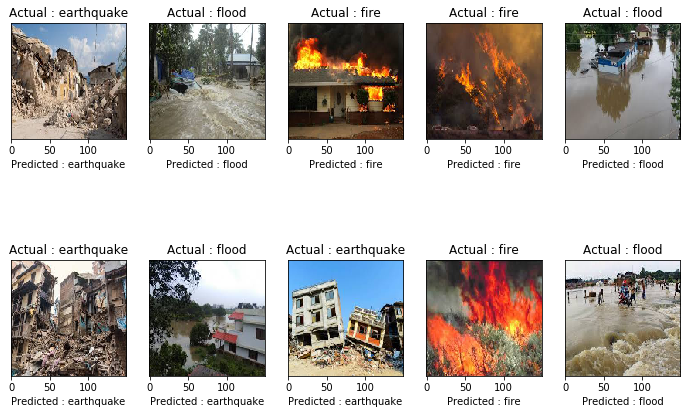

In [49]:
predictions
w=55
h=25
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 2
for i in range(1, columns*rows+1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.yticks([])
    plt.title('Actual : {}'.format(test_labes[i-1]))
    plt.xlabel('Predicted : {}'.format(predictions[i-1]))
    plt.imshow(test_img[i-1])
plt.show()